In [1]:
import numpy as np
import pandas as pd

# from compiler.ast import flatten
from random import Random
from pandas import DataFrame
from numpy import log
from numpy import mat
from numpy import ones
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as pl

In [2]:
class adaboost (object):
    T=500
    m=0
    weakClassArr=[]
    weakalpha=[]
    def __init__(self,T):
        self.T=T        
    def fit(self,X_train,Y_train):
        
        #self.m=X_train.shape[0]
        #m=shape(X_train)[0]
        m=X_data.shape[0]
        D=ones((m))/m
        print("sdsd",D.shape)
        print("sdsd",type(D))
        #aggClassEst=mat(zeros((self.m,1)))
        for i in range(self.T):
            dt_stump=DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
            dt_stump.fit(X_data,Y_data,sample_weight=D.T)
            
            error=mat(ones(m))
            error[mat(dt_stump.predict(X_data))==mat(Y_data)]=0#error shape:(1,30621)
            error=D.T*error.T
            
            alpha=float(0.5*log((1.0-error)/max(error,1e-16)))
            self.weakalpha.append(alpha)
            self.weakClassArr.append(dt_stump)
            
#             expon=np.multiply(-1*alpha*mat(Y_data).T,mat(dt_stump.predict(X_data)))
            expon=-1*alpha*mat(Y_data)*mat(dt_stump.predict(X_data)).T
           # print(D.shape)
#             D=np.multiply(D,np.exp(expon))
            D=mat(D).T*np.exp(expon)
            #print(D.shape)
            D=np.ravel(D/D.sum())
            #print(D.shape)
    
    def predict(self,X_test):
        data=mat(X_test)
        m=data.shape[0]
        Sum=mat(np.zeros((m,1)))
        
        
        for i in range (len(self.weakClassArr)):
            weak_result=self.weakalpha[i]*mat(self.weakClassArr[i].predict(X_test))
            #print("in",self.weakClassArr[i].predict(X_test).shape)
            #print("inasdas",self.weakalpha[i].shape)
            #print("inasdas",weak_result.shape)
            #print("sum",Sum.shape)
            Sum+=weak_result.T
            
        return np.ravel(np.sign(Sum))
            
            
            
            
            
    

In [3]:
adult_header=["age","workclass","fnlwgt","education","education-num",
              "marital-status","occupation","relationship","race","sex","capital-gain",
              "capital-loss","hours-per-week","native-country","label"]
adult_data=pd.read_csv("./adult.data",index_col=False,names=adult_header)
adult_test=pd.read_csv("./adult2.test",index_col=False,names=adult_header)

In [4]:
#adult_data.shape
#adult2.test的数据是adult的数据删去label的最后一个字符"."得到的;

In [5]:
adult_data[adult_data==" ?"]=np.nan
adult_test[adult_test==" ?"]=np.nan
#print(adult_data["age"])
adult_data.dropna(axis=0,how='any',inplace=True)
adult_test.dropna(axis=0,how='any',inplace=True)

/home/larryytr/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [6]:
#print(adult_data)
print(adult_data.shape)


(30162, 15)


In [7]:
discre_name=["workclass","education","marital-status",
             "occupation","relationship","race",
             "sex","native-country","label"]
for name in discre_name:
    key=np.unique(adult_data[name])
    #print(key)
    le=preprocessing.LabelEncoder()
    le.fit(key)
    adult_test[name]=le.transform(adult_test[name])
    adult_data[name]=le.transform(adult_data[name])
#print(adult_data)

In [8]:
# 我觉得可能还可以用one-hot的方法来处理类别;

In [9]:
X_data=adult_data.values[0:150,0:14]
#print(X_data[:,0:14])
Y_data=adult_data.values[0:150,14]
#print(Y_data)
X_test=adult_test.values[0:150,0:14]
#print(X_test[:,0:14])
Y_test=adult_test.values[0:150,14]
print(Y_test)
#记得删除

[0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0]


In [10]:
# # m=X_data.shape[0]
# D=ones((m))/m
# min_max_scaler = preprocessing.MinMaxScaler()
# # B=min_max_scaler.fit_transform(D)
# print(D)
# dt_stump=DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
# dt_stump.fit(X_data,Y_data,sample_weight=D.T)
# error=mat(ones(m))
# error[mat(dt_stump.predict(X_data))==mat(Y_data)]=0
# print(error.T.shape)
# error=D.T*error.T
# B=ones((m,1))/m

# alpha=float(0.5*log((1.0-error)/max(error,1e-16)))
# weadsd=[]
# weadsd.append(dt_stump)
# expon=-1*alpha*mat(Y_data)*mat(dt_stump.predict(X_data)).T

# print("exp",np.exp(expon).shape)
# # D=np.multiply(D.T,np.exp(expon))
# print(mat(D))
# D=mat(D).T*np.exp(expon)
# print(D.shape)
# D=D/D.sum()

sdsd (150,)
sdsd <class 'numpy.ndarray'>
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
0.8
auc 0.5454545454545454
auc 0.5454545454545454


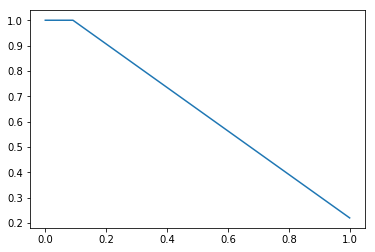

In [11]:
Adaboost_classfier=adaboost(100)
Adaboost_classfier.fit(X_data,Y_data)
y_pred=mat(Adaboost_classfier.predict(X_test))
y_pred.astype(np.int)
y_pred=np.array(np.ravel(y_pred))
print(np.ravel(y_pred))

y_true=np.array(Y_test)
#print(y_actual)
precision, recall, thresholds = precision_recall_curve( y_true,y_pred)
score=accuracy_score(y_true, y_pred)
print(score)
pr_auc = auc(recall, precision)
test_auc =metrics.roc_auc_score(y_true, y_pred)#验证集上的auc值
pl.plot(recall, precision)
print("auc",roc_auc_score(y_true, y_pred))
print("auc",test_auc)